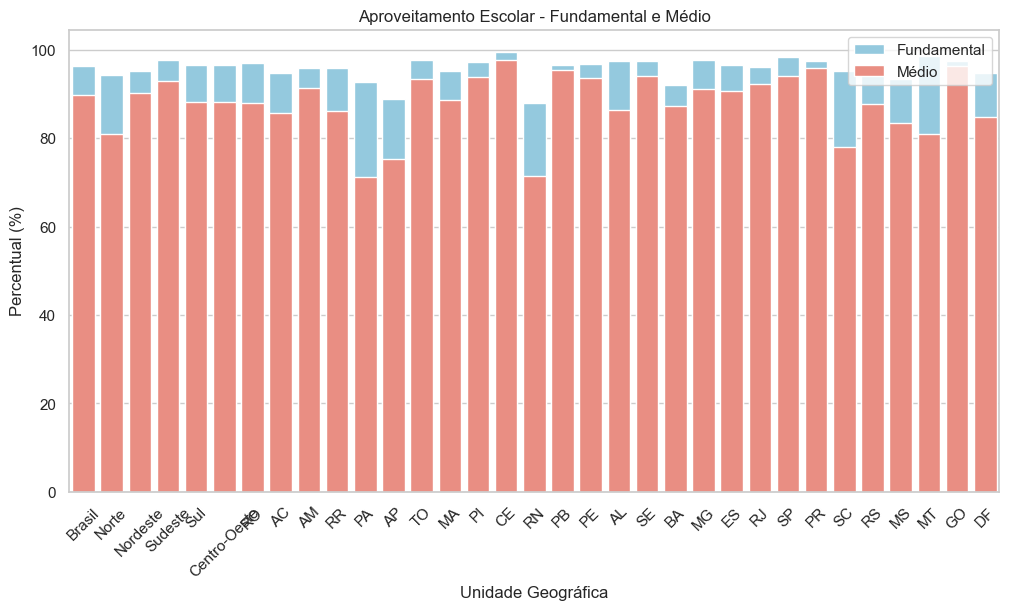

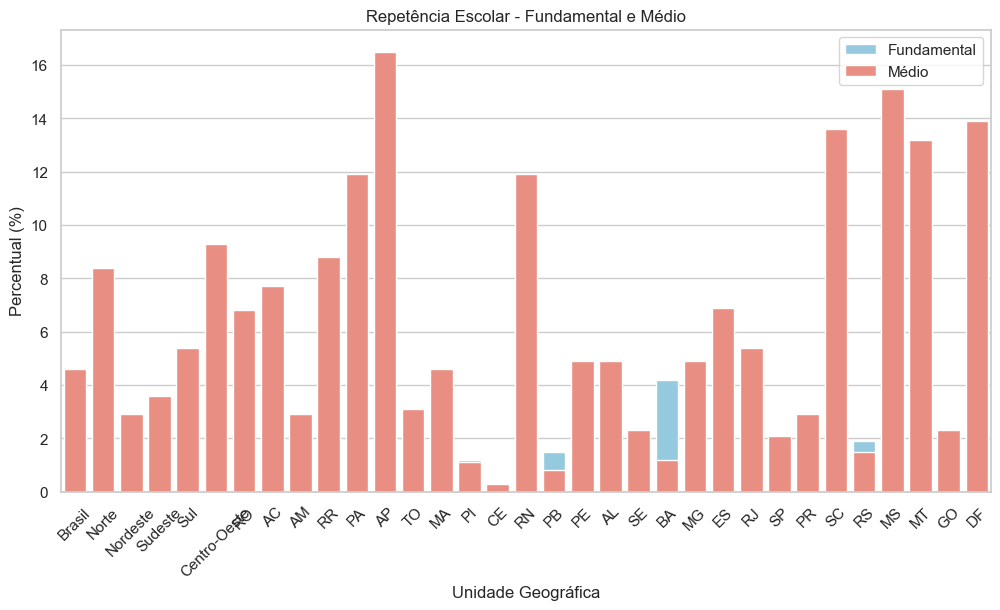

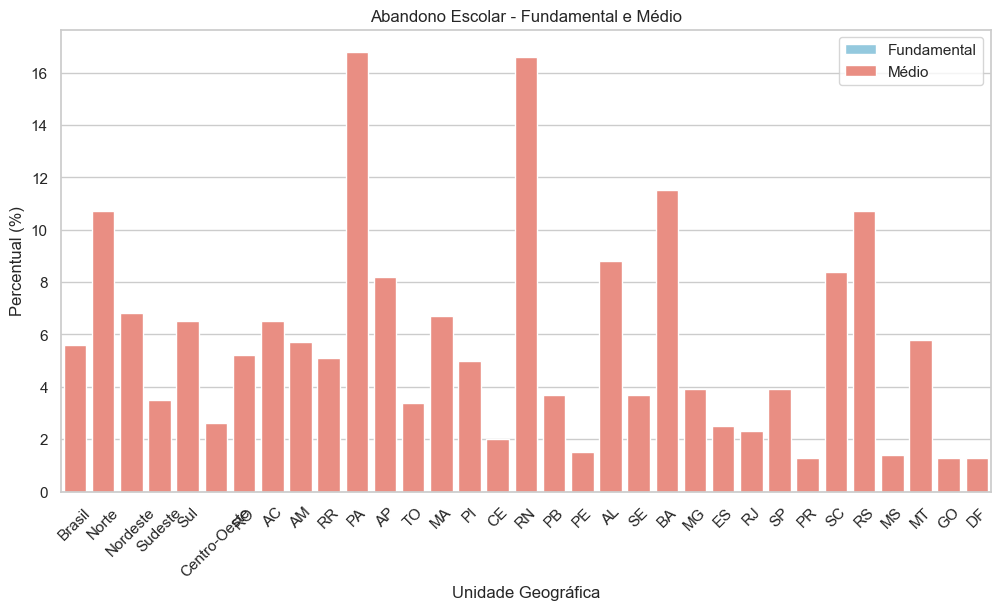

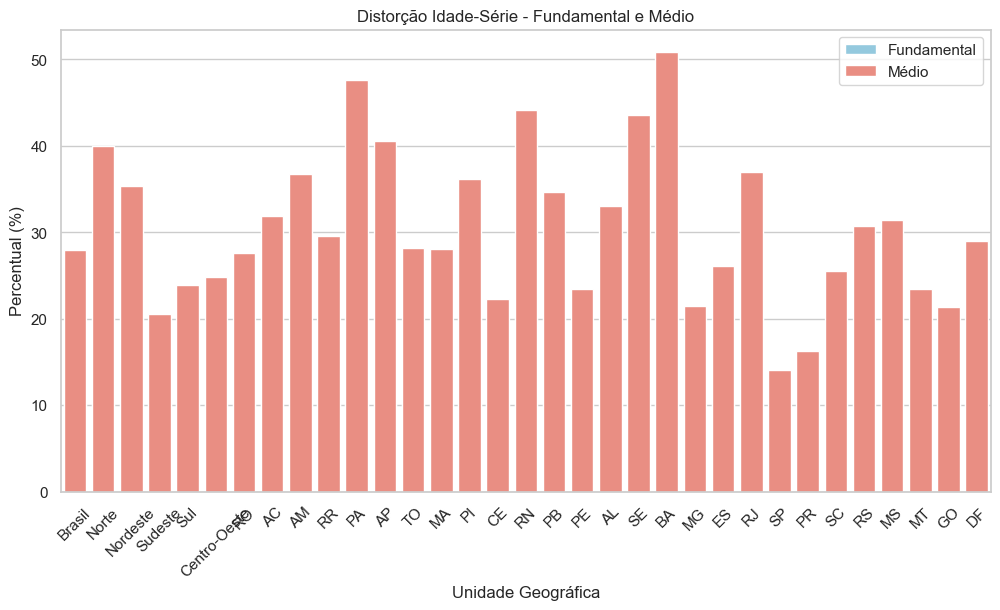

'relatorio_educacao_com_graficos.pdf'

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from fpdf import FPDF
import pandas as pd

sns.set(style="whitegrid")

data = pd.read_csv('merged_df.csv')

def gerar_grafico(df, indicador_fund, indicador_med, titulo):
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Unidade Geográfica', y=indicador_fund, data=df, color='skyblue', label='Fundamental')
    sns.barplot(x='Unidade Geográfica', y=indicador_med, data=df, color='salmon', label='Médio')
    plt.title(titulo)
    plt.ylabel('Percentual (%)')
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()

gerar_grafico(data, 'FUND Apr', 'MED Apr', 'Aproveitamento Escolar - Fundamental e Médio')
gerar_grafico(data, 'FUND Rep', 'MED Rep', 'Repetência Escolar - Fundamental e Médio')
gerar_grafico(data, 'FUND Aban', 'MED Aban', 'Abandono Escolar - Fundamental e Médio')
gerar_grafico(data, 'FUND Distorção ID-S', 'MED Distorção ID-S', 'Distorção Idade-Série - Fundamental e Médio')

class RelatorioPDF(FPDF):
    def header(self):
        self.set_font('Arial', 'B', 12)
        self.cell(0, 10, 'Relatório de Desigualdade na Educação', 0, 1, 'C')
        self.ln(10)

    def footer(self):
        self.set_y(-15)
        self.set_font('Arial', 'I', 8)
        self.cell(0, 10, f'Página {self.page_no()}', 0, 0, 'C')
    
    def adicionar_titulo(self, titulo):
        self.set_font('Arial', 'B', 12)
        self.cell(0, 10, titulo, 0, 1, 'L')
        self.ln(5)
    
    def adicionar_paragrafo(self, texto):
        self.set_font('Arial', '', 12)
        self.multi_cell(0, 10, texto)
        self.ln(5)

def salvar_grafico(df, indicador_fund, indicador_med, titulo, nome_arquivo):
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Unidade Geográfica', y=indicador_fund, data=df, color='skyblue', label='Fundamental')
    sns.barplot(x='Unidade Geográfica', y=indicador_med, data=df, color='salmon', label='Médio')
    plt.title(titulo)
    plt.ylabel('Percentual (%)')
    plt.legend()
    plt.xticks(rotation=45)
    caminho_imagem = f"{nome_arquivo}.png"
    plt.savefig(caminho_imagem)
    plt.close()
    return caminho_imagem

img1 = salvar_grafico(data, 'FUND Apr', 'MED Apr', 'Aproveitamento Escolar - Fundamental e Médio', 'grafico_aproveitamento')
img2 = salvar_grafico(data, 'FUND Rep', 'MED Rep', 'Repetência Escolar - Fundamental e Médio', 'grafico_repetencia')
img3 = salvar_grafico(data, 'FUND Aban', 'MED Aban', 'Abandono Escolar - Fundamental e Médio', 'grafico_abandono')
img4 = salvar_grafico(data, 'FUND Distorção ID-S', 'MED Distorção ID-S', 'Distorção Idade-Série - Fundamental e Médio', 'grafico_distorcao')

def criar_relatorio_com_graficos():
    pdf = RelatorioPDF()
    pdf.add_page()
    
    pdf.adicionar_titulo('Introdução')
    pdf.adicionar_paragrafo(
        "Este relatório apresenta uma análise da desigualdade educacional "
        "no Brasil, utilizando dados de aproveitamento, repetência, abandono "
        "e distorção idade-série, em diferentes regiões do país."
    )
    
    pdf.adicionar_titulo('Aproveitamento Escolar')
    pdf.adicionar_paragrafo("O gráfico abaixo mostra o percentual de aproveitamento escolar no ensino fundamental e médio.")
    if pdf.get_y() + 100 > 270:
        pdf.add_page()
    pdf.image(img1, x=10, y=pdf.get_y(), w=180)
    pdf.ln(100)
    
    pdf.adicionar_titulo('Repetência Escolar')
    pdf.adicionar_paragrafo("O gráfico abaixo mostra o percentual de repetência escolar no ensino fundamental e médio.")
    if pdf.get_y() + 100 > 270:
        pdf.add_page()
    pdf.image(img2, x=10, y=pdf.get_y(), w=180)
    pdf.ln(100)
    
    pdf.adicionar_titulo('Abandono Escolar')
    pdf.adicionar_paragrafo("O gráfico abaixo mostra o percentual de abandono escolar no ensino fundamental e médio.")
    if pdf.get_y() + 100 > 270:
        pdf.add_page()
    pdf.image(img3, x=10, y=pdf.get_y(), w=180)
    pdf.ln(100)
    
    pdf.adicionar_titulo('Distorção Idade-Série')
    pdf.adicionar_paragrafo(
        "O gráfico abaixo mostra o percentual de alunos com distorção idade-série."
    )
    if pdf.get_y() + 100 > 270:
        pdf.add_page()
    pdf.image(img4, x=10, y=pdf.get_y(), w=180)
    pdf.ln(100)
    
    pdf.adicionar_titulo('Conclusão')
    pdf.adicionar_paragrafo(
        "Os resultados apontam para uma desigualdade significativa entre as regiões brasileiras."
    )
    
    caminho_pdf = "relatorio_educacao_com_graficos.pdf"
    pdf.output(caminho_pdf)
    return caminho_pdf

caminho_pdf_final = criar_relatorio_com_graficos()
caminho_pdf_final
